In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import random
import pandas_profiling
from pandas_profiling.utils.cache import cache_file

In [2]:
# External Data and Interim Data File Locations
ext_data = '../data/external/'
interim_data = '../data/interim/'
report_figures = '../reports/figures/'

In [3]:
df = pd.read_csv(ext_data + 'name_pairs.txt', sep=",", names=['name_a', 'name_b'], header=None)
df.shape

(17510, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17510 entries, 0 to 17509
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name_a  17510 non-null  object
 1   name_b  17510 non-null  object
dtypes: object(2)
memory usage: 273.7+ KB


In [5]:
df.sample(10)

,name_a,name_b
360,Aleksej,Ales
16896,Vucko,Vuki
10027,Marcela,Celinha
11614,Minjan,Mil
4398,Elsie,Betty
1688,Bert,Hugo
1913,Bitse,Besse
10662,Mat,Marte
10204,Mari,Maria
8025,Katie,Katherine


In [6]:
# Positive Class
df['target'] = 1

### Create Random Sample of Negative Class

In [7]:
all_names = df.loc[:, 'name_a':'name_b'].values.tolist()
print(len(all_names))
all_names[:5]

17510


[['Aad', 'Adriaan'],
 ['Aake', 'Aarne'],
 ['Aake', 'Aarno'],
 ['Aake', 'Arska'],
 ['Aandrea', 'Drea']]

In [8]:
unique_names = list(set([item for items in all_names for item in items]))
print(len(unique_names))
unique_names[:5]

5877


['Anyuta', 'Daco', 'Kami', 'Schorsc', 'Yevgeny']

In [9]:
alt_pairs = list(zip(df.name_a, df.name_b))+ list(zip(df.name_b, df.name_a))
print(len(alt_pairs))
alt_pairs[:5]

35020


[('Aad', 'Adriaan'),
 ('Aake', 'Aarne'),
 ('Aake', 'Aarno'),
 ('Aake', 'Arska'),
 ('Aandrea', 'Drea')]

In [10]:
comb = list(combinations(unique_names, 2))
print(len(comb))
comb[:5]

17266626


[('Anyuta', 'Daco'),
 ('Anyuta', 'Kami'),
 ('Anyuta', 'Schorsc'),
 ('Anyuta', 'Yevgeny'),
 ('Anyuta', 'Makha')]

In [11]:
non_alt = list(set(comb) - set(alt_pairs))
print(len(non_alt))
non_alt[:5]

17249462


[('Julien', 'Susse'),
 ('Henrietta', 'Lizbeth'),
 ('Tolu', 'Danilo'),
 ('Radostina', 'Hele'),
 ('Viorel', 'Jase')]

In [12]:
# Undersample the negative class for 1:4 class imbalance instead of 1:1000 extreme class imbalance
non_alt = pd.DataFrame(random.choices(non_alt, k=70040), columns=['name_a', 'name_b'])
non_alt.shape

(70040, 2)

In [13]:
# Negative Class
non_alt['target'] = 0

In [14]:
non_alt.sample(10)

,name_a,name_b,target
26764,Seryozhka,Henio,0
62840,Tasko,Dosla,0
62606,Milijana,Gilbert,0
56685,Guillo,Wilhelm,0
6331,Romek,Alfonso,0
43755,Varvarik,Zebulon,0
69840,Rosemary,Chisu,0
47777,Leticia,Anatoly,0
38613,Barry,Joakim,0
52628,Micah,Von,0


In [15]:
print('positive class ratio 1:{}'.format(int(len(non_alt)/len(df))))

positive class ratio 1:4


In [16]:
df = pd.concat([df, non_alt])
df.shape

(87550, 3)

In [17]:
df.sample(10)

,name_a,name_b,target
31,Maura,Victor,0
25800,Mitka,Roderick,0
42233,Lib,Jehu,0
27372,Joci,Flick,0
16765,Virge,Genevieve,1
27748,Ruza,Jennet,0
14316,Honza,Chepe,0
44043,Bess,Tobbe,0
22322,Zacharias,Bengt,0
54115,Tamzine,Julot,0


Text(0.5, 0, 'Count')

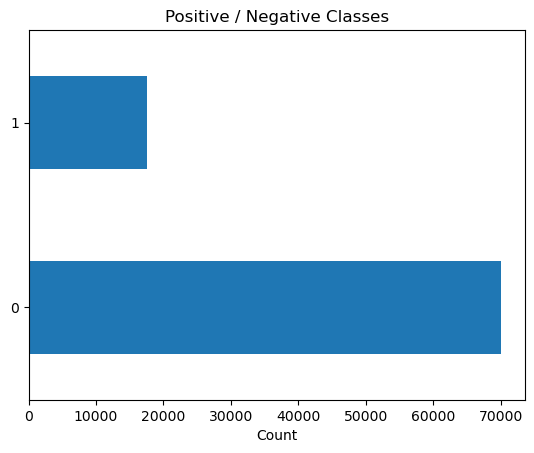

In [18]:
ax = df.target.value_counts(dropna=False).plot(kind='barh', title='Positive / Negative Classes')
ax.set_xlabel('Count')

In [19]:
# Save output to interim data folder as csv file
df.to_csv(interim_data + 'pos_neg_class_file.csv', index=False)

In [20]:
profile_report = df.profile_report(explorative=True, html={'style': {'full_width': True}})
profile_report.to_file(report_figures + "wrangled_data_profile.html")

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]